In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

chances = [.7, .45]

In [2]:
df = pd.read_csv('out.csv')
# Splitting df between "advantage" (high chance to win) runs and "fair" (~50% chance to win) runs
grouped_df = df.groupby(df.P_chance)
df_advantage = grouped_df.get_group(chances[0])
df_fair = grouped_df.get_group(chances[1])

> Ao final das suas simulações, com base nos logs gerados (vamos denominá-los datasets a partir de agora) você deverá analisar os datasets e responder às seguintes perguntas:  
> * Qual a probabilidade do Jogador A/B vencerem as Partidas 1 e a Partidas 2? Para responder, considere $Xi$ uma VA que representa o número de vitórias do jogador $i$ em cada caso, e que nosso espaço amostral contem 3 partidas. Mostre uma análise estatística baseada em média e desvio padrão em cada caso.  
Com base no dataset, a probabilidade A vencer B é de $\frac{{media(tot\_sets\_P)}}{tam\_amostra} $. A probabilidade é o complemento a um deste. Selecionando 3 aleatórias, temos que:  


In [3]:
def P_wins(df):
    return len(df[df.tot_sets_P > df.tot_sets_Q].index) # return rows where P beats Q

In [4]:
sample_size = 3
# Partida 1
print(f"Probabilidade para P ganhar quando chance={chances[0]} com {sample_size} amostras:\t{P_wins(df_advantage.sample(n=sample_size))/sample_size}")
# Partida 2
print(f"Probabilidade para P ganhar quando chance={chances[1]} com {sample_size} amostras:\t{P_wins(df_fair.sample(n=sample_size))/sample_size}")

# Média com o df inteiro
print(f"Probabilidade para P ganhar quando chance={chances[0]} com todas as {len(df_fair.index)} amostras:\t{P_wins(df_advantage)/len(df_advantage.index)}")
print(f"Probabilidade para P ganhar quando chance={chances[1]} com todas as {len(df_fair.index)} amostras:\t{P_wins(df_fair)/len(df_fair.index)}")

Probabilidade para P ganhar quando chance=0.7 com 3 amostras:	1.0
Probabilidade para P ganhar quando chance=0.45 com 3 amostras:	0.0
Probabilidade para P ganhar quando chance=0.7 com todas as 200 amostras:	1.0
Probabilidade para P ganhar quando chance=0.45 com todas as 200 amostras:	0.085


> * Qual a distribuição do número de sets, games e pontos nas Partidas 1 e 2? Mostre uma análise estatística baseada em média e desvio padrão em cada caso.


Partida 1

In [5]:
played_games_advantage = df_advantage["tot_games_P"].sum(
) + df_advantage["tot_games_Q"].sum()
played_games_fair = df_fair["tot_games_P"].sum() + df_fair["tot_games_Q"].sum()

mean_P_pts_per_game = [
    [
        df_advantage["tot_pts_P"].sum()/played_games_advantage,
        df_advantage["tot_pts_P"].std()
    ],
    [
        df_fair["tot_pts_P"].sum()/played_games_fair,
        df_fair["tot_pts_P"].std()
    ]
]
print(
    f"Média de pontos e desvio que P marcou por game:\n\tVantagem:\t{mean_P_pts_per_game[0][0]}\tDesvio:\t{mean_P_pts_per_game[0][1]}\n\tJusto:\t\t{mean_P_pts_per_game[1][0]}\tDesvio:\t{mean_P_pts_per_game[1][1]}")

mean_Q_pts_per_game = [
    [
        df_advantage["tot_pts_Q"].sum()/played_games_advantage,
        df_advantage["tot_pts_Q"].std()
    ],
    [
        df_fair["tot_pts_Q"].sum()/played_games_fair,
        df_fair["tot_pts_Q"].std()
    ]
]
print(
    f"Média de pontos e desvio que Q marcou por game:\n\tVantagem:\t{mean_Q_pts_per_game[0][0]}\tDesvio:\t{mean_Q_pts_per_game[0][1]}\n\tJusto:\t\t{mean_Q_pts_per_game[1][0]}\tDesvio:\t{mean_Q_pts_per_game[1][1]}")

df_advantage.describe()


Média de pontos e desvio que P marcou por game:
	Vantagem:	3.3469693190321776	Desvio:	4.623720792808456
	Justo:		2.3530919029723267	Desvio:	23.917138679471364
Média de pontos e desvio que Q marcou por game:
	Vantagem:	1.3694188076827138	Desvio:	8.456064399330703
	Justo:		3.059446532285617	Desvio:	17.342471177218755


,tot_pts_P,tot_pts_Q,tot_games_P,tot_games_Q,tot_sets_P,tot_sets_Q,run,P_chance
count,200.000000,200.000000,200.000000,200.000000,200.0,200.0,200.000000,200.0
mean,67.090000,27.450000,18.020000,2.025000,2.0,0.0,100.500000,0.7
std,4.623721,8.456064,0.199497,1.993551,0.0,0.0,57.879185,0.0
min,60.000000,8.000000,18.000000,0.000000,2.0,0.0,1.000000,0.7
25%,63.000000,22.000000,18.000000,0.000000,2.0,0.0,50.750000,0.7
50%,67.000000,27.000000,18.000000,2.000000,2.0,0.0,100.500000,0.7
75%,70.000000,33.000000,18.000000,3.000000,2.0,0.0,150.250000,0.7
max,84.000000,53.000000,20.000000,11.000000,2.0,0.0,200.000000,0.7


<AxesSubplot:xlabel='tot_pts_P'>

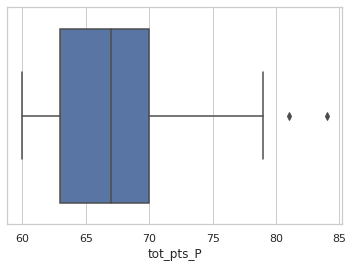

In [6]:
sns.boxplot(x=df_advantage["tot_pts_P"])

<AxesSubplot:xlabel='tot_games_P'>

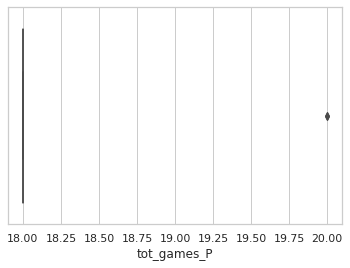

In [7]:
sns.boxplot(x=df_advantage["tot_games_P"])

<AxesSubplot:xlabel='tot_sets_P'>

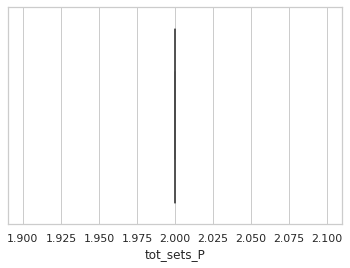

In [8]:
sns.boxplot(x=df_advantage["tot_sets_P"])

Partida 2

In [9]:
df_fair.describe()

,tot_pts_P,tot_pts_Q,tot_games_P,tot_games_Q,tot_sets_P,tot_sets_Q,run,P_chance
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,2.000000e+02
mean,68.875000,89.550000,10.345000,18.925000,0.38500,1.880000,100.500000,4.500000e-01
std,23.917139,17.342471,5.188504,2.384914,0.63939,0.420098,57.879185,1.113009e-16
min,28.000000,55.000000,0.000000,9.000000,0.00000,0.000000,1.000000,4.500000e-01
25%,51.000000,76.000000,6.000000,18.000000,0.00000,2.000000,50.750000,4.500000e-01
50%,65.000000,86.000000,10.000000,18.000000,0.00000,2.000000,100.500000,4.500000e-01
75%,86.250000,101.250000,14.000000,20.000000,1.00000,2.000000,150.250000,4.500000e-01
max,135.000000,149.000000,24.000000,25.000000,2.00000,2.000000,200.000000,4.500000e-01


<AxesSubplot:xlabel='tot_pts_P'>

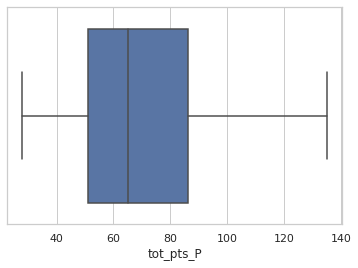

In [10]:
sns.boxplot(x=df_fair["tot_pts_P"])

<AxesSubplot:xlabel='tot_games_P'>

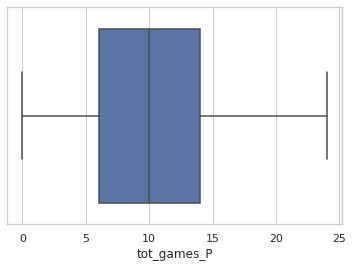

In [11]:
sns.boxplot(x=df_fair["tot_games_P"])

<AxesSubplot:xlabel='tot_sets_P'>

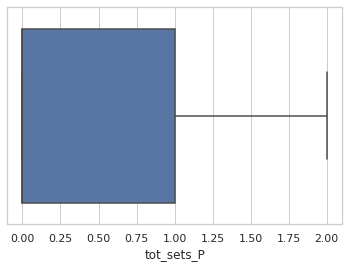

In [12]:
sns.boxplot(x=df_fair["tot_sets_P"])

> * Selecione aleatoriamente, com distribuição uniforme, 10 simulações dentre as $n$ existentes em seus datasets originais. Refaça as 2 análises anteriores e explique as diferenças e semelhanças entre os resultados obtidos.

In [13]:
sample_size = 10
# Partida 1
print(f"Probabilidade para P ganhar quando chance={chances[0]} com {sample_size} amostras:\t{P_wins(df_advantage.sample(n=sample_size))/sample_size}")
# Partida 2
print(f"Probabilidade para P ganhar quando chance={chances[1]} com {sample_size} amostras:\t{P_wins(df_fair.sample(n=sample_size))/sample_size}")

# Média com o df inteiro
print(f"Probabilidade para P ganhar quando chance={chances[0]} com todas as {len(df_fair.index)} amostras:\t{P_wins(df_advantage)/len(df_advantage.index)}")
print(f"Probabilidade para P ganhar quando chance={chances[1]} com todas as {len(df_fair.index)} amostras:\t{P_wins(df_fair)/len(df_fair.index)}")

Probabilidade para P ganhar quando chance=0.7 com 10 amostras:	1.0
Probabilidade para P ganhar quando chance=0.45 com 10 amostras:	0.1
Probabilidade para P ganhar quando chance=0.7 com todas as 200 amostras:	1.0
Probabilidade para P ganhar quando chance=0.45 com todas as 200 amostras:	0.085
